# Importing the necessary libraries and train dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Problem1_train.csv', na_values = ['NA', "-99"])
data.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,3265646,10,3,8.0,0,0,3,12,21,3,...,0,0.98,0.98,0,0,0,1,17.078496,0,0
1,1784378,8,0,12.0,0,0,0,0,0,0,...,0,0.74,0.74,0,0,0,1,17.051237,0,0
2,1533473,87,2,17.0,0,0,0,0,29,4,...,0,0.26,0.34,0,0,0,1,17.088096,0,0
3,2175794,14,0,2.0,0,0,0,0,0,2,...,0,0.99,0.98,1,0,0,1,17.055810,0,0
4,2268595,20,2,8.0,0,0,0,0,0,0,...,0,0.28,0.37,0,0,0,1,17.026387,0,0


# Finding the necessary information about the dataset and checking for null values

In [3]:
data.shape

(34292, 25)

In [4]:
data.isnull().sum()

ID           0
IV           0
A1           0
A2        1672
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15       2042
A16       1934
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

# Removing the null values 

In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

ID        0
IV        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
A20       0
A21       0
A22       0
Target    0
dtype: int64

In [7]:
data.shape

(32250, 25)

# Plotting a heat map to understand the correlation between attributs and target variable

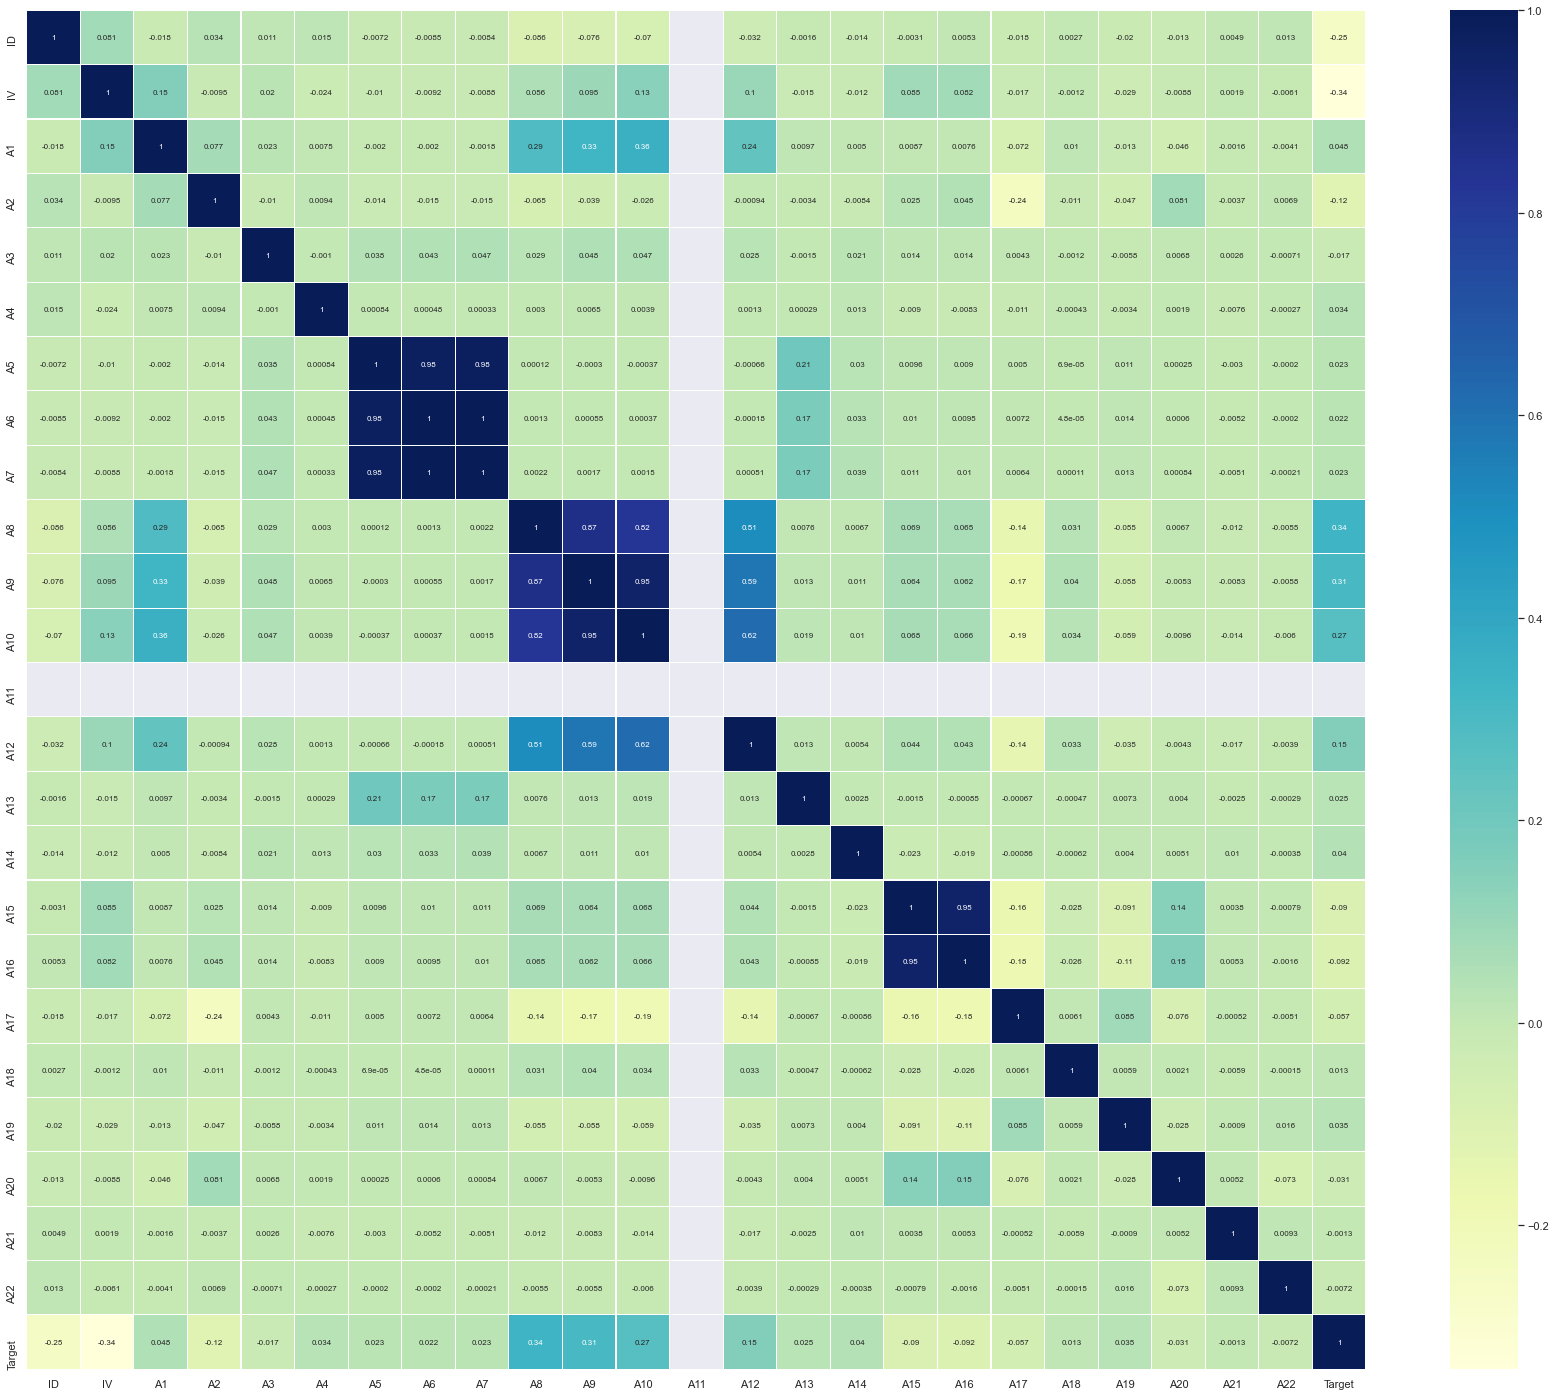

In [8]:
sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(data.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()

## We find the number of unique values in each column

In [9]:
data.nunique()

ID        20926
IV          120
A1           13
A2           17
A3           67
A4           29
A5          211
A6          254
A7          298
A8           17
A9           65
A10          94
A11           1
A12         149
A13           2
A14          46
A15         101
A16         101
A17           2
A18           2
A19           2
A20           2
A21       20904
A22           2
Target        2
dtype: int64

In [10]:
data = data.drop(['A11', 'ID'], axis = 1)

In [11]:
data.shape

(32250, 23)

We remove the columns A11 and ID because they do not affect the target variable. A11 because it is has only one unique value. ID beacuse it is used to identify a record like an index.

In [12]:
data = data.drop(['A6', 'A7'], axis = 1)

We drop the columns A6 and A7 because of multi-collinerity

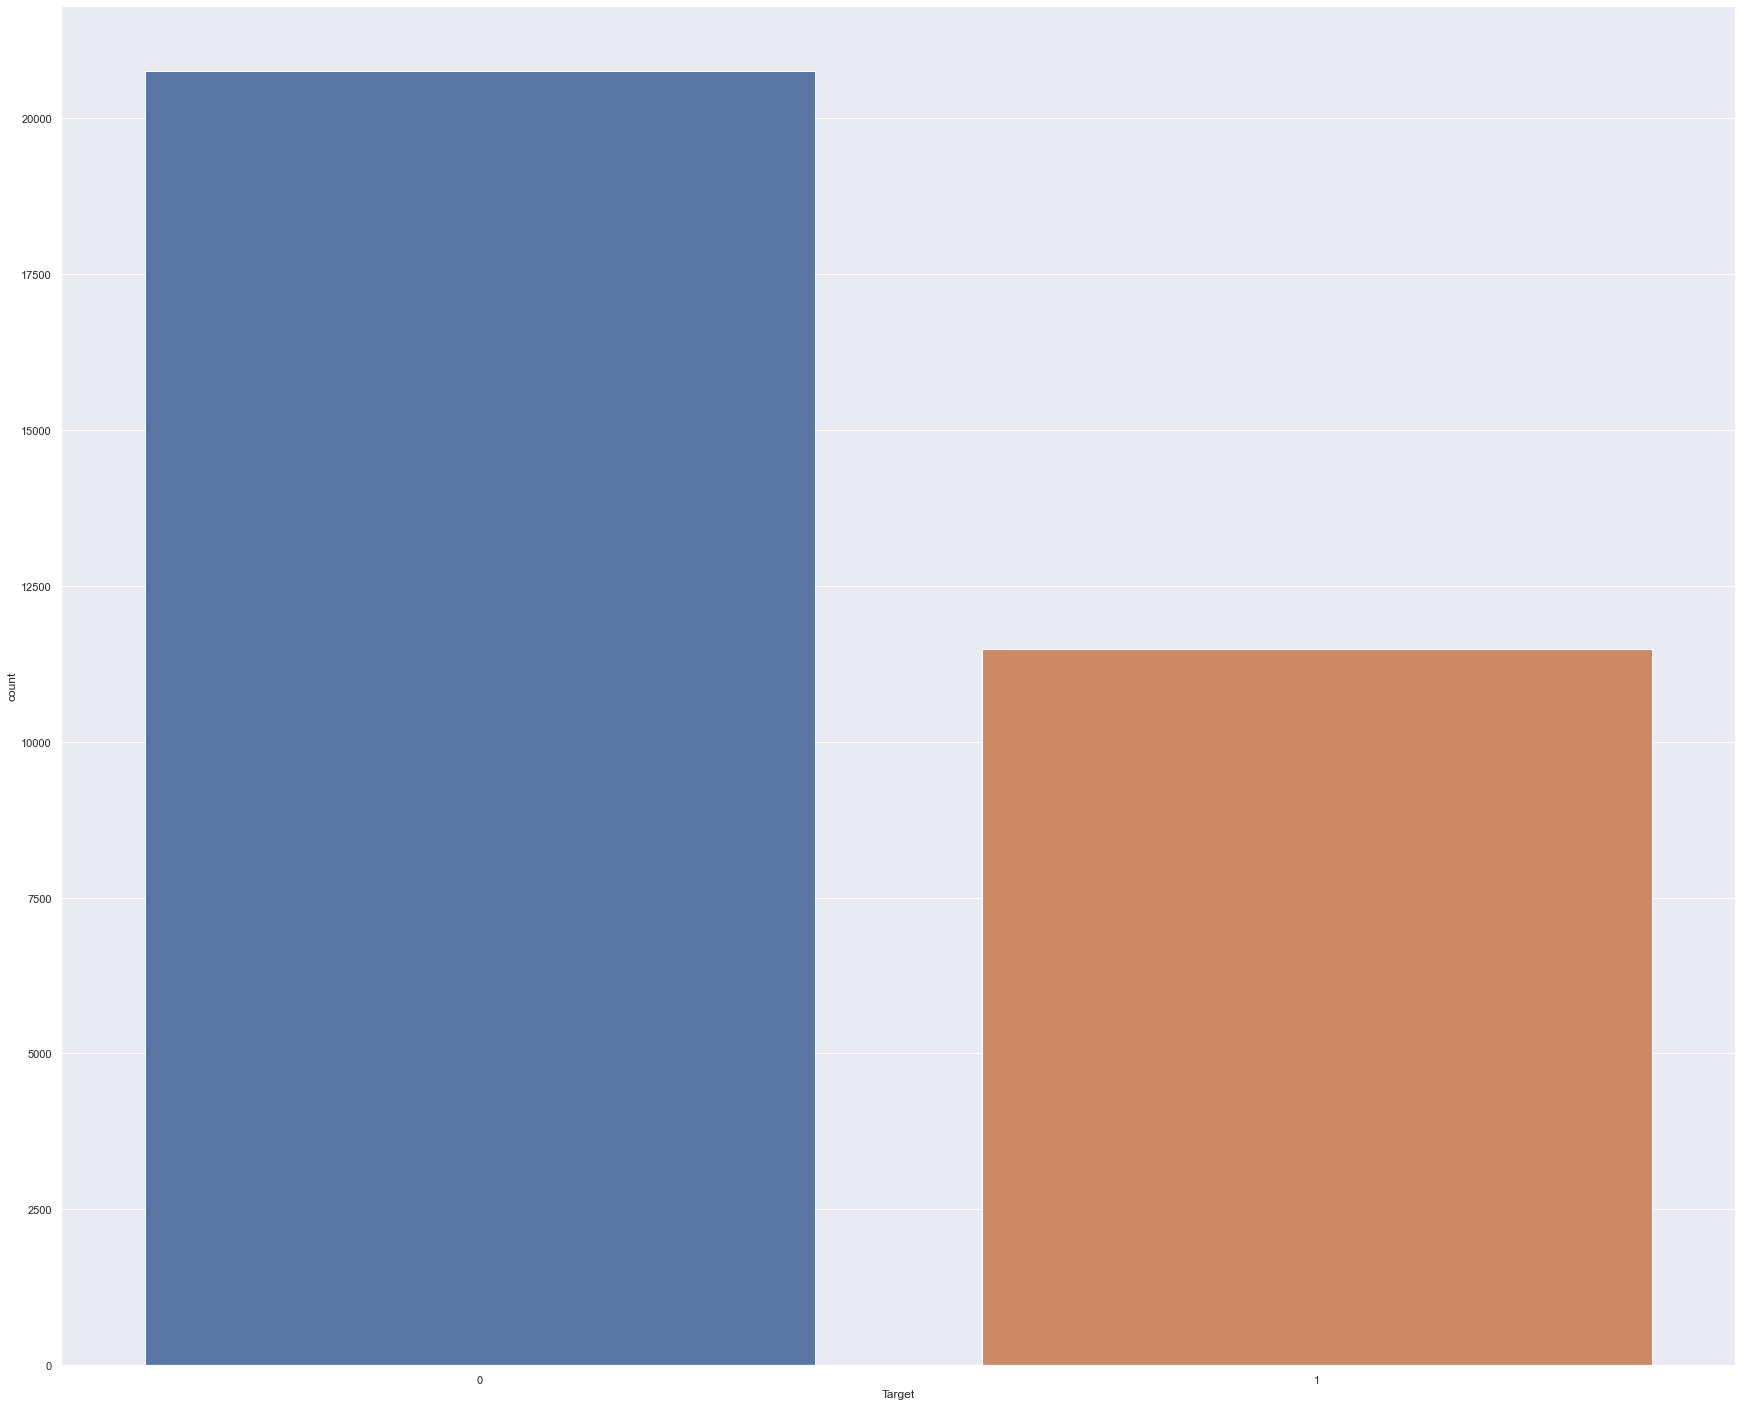

In [13]:
sns.countplot(x='Target',data=data)
sns.set(rc = {'figure.figsize':(5,3)})
plt.show()

In [14]:
data['Target'].value_counts()

0    20758
1    11492
Name: Target, dtype: int64

## Plotting boxplot for each column individually and identifing any outliers present. If any capping the column values th remove the outliers

<AxesSubplot:>

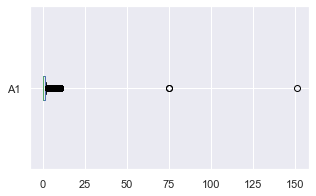

In [15]:
data['A1'].plot(kind='box',vert=False)

In [16]:
percentile25 = data['A1'].quantile(0.25)
percentile75 = data['A1'].quantile(0.75)

In [17]:
iqr = percentile75 - percentile25
iqr

1.0

In [18]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [19]:
data['A1'] = np.where(
    data['A1'] > upper_limit,
    upper_limit,
    np.where(
        data['A1'] < lower_limit,
        lower_limit,
        data['A1']
    )
)


<AxesSubplot:>

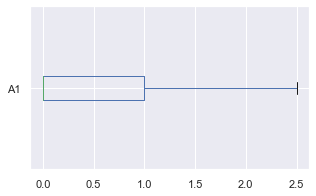

In [20]:
data['A1'].plot(kind='box',vert=False)

<AxesSubplot:>

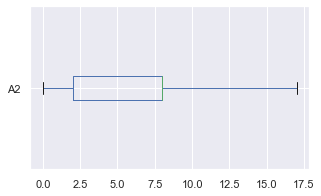

In [21]:
data['A2'].plot(kind='box',vert=False)

<AxesSubplot:>

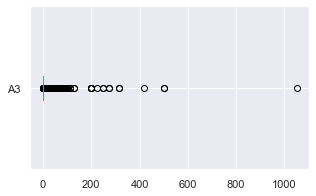

In [22]:
data['A3'].plot(kind='box',vert=False)

In [23]:
dups = data.pivot_table(index = ['A3'], aggfunc = 'size')
dups

A3
0       29827
1         721
2         318
3         187
4         199
        ...  
272         2
315         2
420         1
500         2
1050        1
Length: 67, dtype: int64

In [24]:
percentile25 = data['A3'].quantile(0.25)
percentile75 = data['A3'].quantile(0.75)

In [25]:
iqr = percentile75 - percentile25
iqr

0.0

In [26]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [27]:
data['A3'] = np.where(
    data['A3'] > upper_limit,
    upper_limit,
    np.where(
        data['A3'] < lower_limit,
        lower_limit,
        data['A3']
    )
)

<AxesSubplot:>

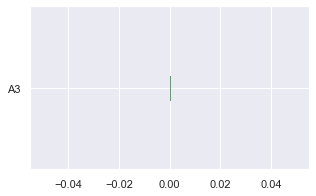

In [28]:
data['A3'].plot(kind='box',vert=False)

In [29]:
dups = data.pivot_table(index = ['A3'], aggfunc = 'size')
dups

A3
0.0    32250
dtype: int64

We can drop A3 since it has only one value after outlier treatment

<AxesSubplot:>

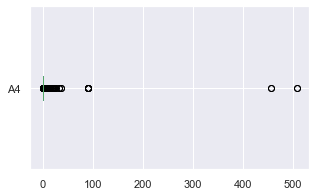

In [30]:
data['A4'].plot(kind='box',vert=False)

In [31]:
percentile25 = data['A4'].quantile(0.25)
percentile75 = data['A4'].quantile(0.75)

In [32]:
iqr = percentile75 - percentile25
iqr

0.0

In [33]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [34]:
data['A4'] = np.where(
    data['A4'] > upper_limit,
    upper_limit,
    np.where(
        data['A4'] < lower_limit,
        lower_limit,
        data['A4']
    )
)

In [35]:
dups = data.pivot_table(index = ['A4'], aggfunc = 'size')
dups

A4
0.0    32250
dtype: int64

<AxesSubplot:>

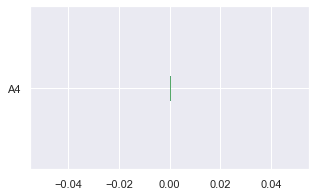

In [36]:
data['A4'].plot(kind='box',vert=False)

We can drop A4 since it has only one value after outlier treatment

<AxesSubplot:>

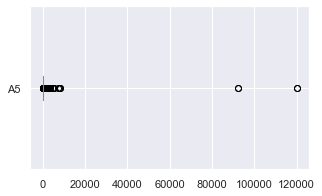

In [37]:
data['A5'].plot(kind='box',vert=False)

In [38]:
percentile25 = data['A5'].quantile(0.25)
percentile75 = data['A5'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

8.0

In [39]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

20.0
-12.0


In [40]:
data['A5'] = np.where(
    data['A5'] > upper_limit,
    upper_limit,
    np.where(
        data['A5'] < lower_limit,
        lower_limit,
        data['A5']
    )
)

<AxesSubplot:>

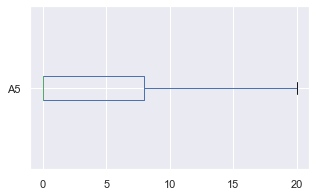

In [41]:
data['A5'].plot(kind='box',vert=False)

<AxesSubplot:>

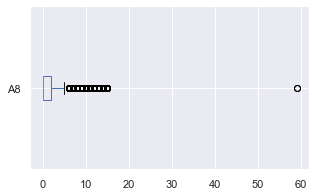

In [42]:
data['A8'].plot(kind='box',vert=False)

In [43]:
percentile25 = data['A8'].quantile(0.25)
percentile75 = data['A8'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

2.0

In [44]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

5.0
-3.0


In [45]:
data['A8'] = np.where(
    data['A8'] > upper_limit,
    upper_limit,
    np.where(
        data['A8'] < lower_limit,
        lower_limit,
        data['A8']
    )
)

<AxesSubplot:>

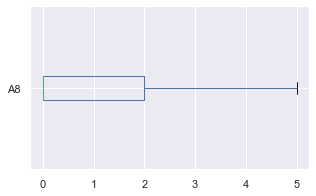

In [46]:
data['A8'].plot(kind='box',vert=False)

<AxesSubplot:>

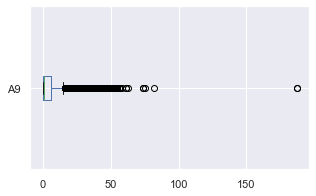

In [47]:
data['A9'].plot(kind='box',vert=False)

In [48]:
percentile25 = data['A9'].quantile(0.25)
percentile75 = data['A9'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

6.0

In [49]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

15.0
-9.0


In [50]:
data['A9'] = np.where(
    data['A9'] > upper_limit,
    upper_limit,
    np.where(
        data['A9'] < lower_limit,
        lower_limit,
        data['A9']
    )
)

<AxesSubplot:>

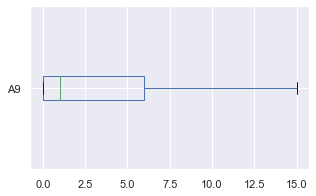

In [51]:
data['A9'].plot(kind='box',vert=False)

<AxesSubplot:>

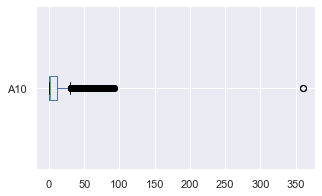

In [52]:
data['A10'].plot(kind='box',vert=False)

In [53]:
percentile25 = data['A10'].quantile(0.25)
percentile75 = data['A10'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

12.0

In [54]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

30.0
-18.0


In [55]:
data['A10'] = np.where(
    data['A10'] > upper_limit,
    upper_limit,
    np.where(
        data['A10'] < lower_limit,
        lower_limit,
        data['A10']
    )
)

<AxesSubplot:>

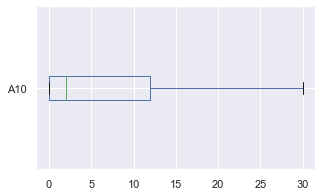

In [56]:
data['A10'].plot(kind='box',vert=False)

<AxesSubplot:>

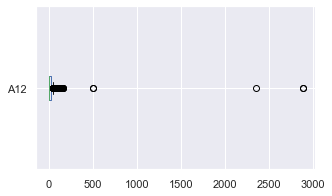

In [57]:
data['A12'].plot(kind='box',vert=False)

In [58]:
percentile25 = data['A12'].quantile(0.25)
percentile75 = data['A12'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

18.0

In [59]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

45.0
-27.0


In [60]:
data['A12'] = np.where(
    data['A12'] > upper_limit,
    upper_limit,
    np.where(
        data['A12'] < lower_limit,
        lower_limit,
        data['A12']
    )
)

<AxesSubplot:>

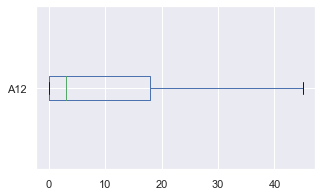

In [61]:
data['A12'].plot(kind='box',vert=False)

<AxesSubplot:>

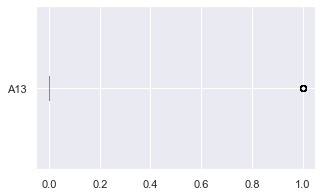

In [62]:
data['A13'].plot(kind='box',vert=False)

In [63]:
dups = data.pivot_table(index = ['A13'], aggfunc = 'size')
dups

A13
0    32221
1       29
dtype: int64

In [64]:
percentile25 = data['A13'].quantile(0.25)
percentile75 = data['A13'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [65]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [66]:
data['A13'] = np.where(
    data['A13'] > upper_limit,
    upper_limit,
    np.where(
        data['A13'] < lower_limit,
        lower_limit,
        data['A13']
    )
)

<AxesSubplot:>

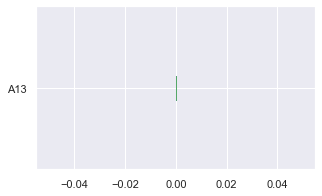

In [67]:
data['A13'].plot(kind='box',vert=False)

<AxesSubplot:>

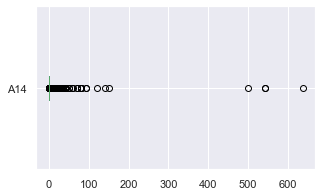

In [68]:
data['A14'].plot(kind='box',vert=False)

In [69]:
dups = data.pivot_table(index = ['A14'], aggfunc = 'size')
dups

A14
0      31405
1        257
2        125
3         86
4         49
5         54
6         29
7         20
8         28
9          8
10        16
11         7
12        30
13        20
14         8
15         3
16         8
17         4
18        13
19         6
20         9
21         2
22         5
23         8
24         2
25         3
27         2
28         3
30         8
32         2
34         1
36         1
40         7
42         1
50         2
59         1
60         1
70         2
80         5
94         2
120        1
140        1
150        1
500        1
544        2
638        1
dtype: int64

In [70]:
percentile25 = data['A14'].quantile(0.25)
percentile75 = data['A14'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [71]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [72]:
data['A14'] = np.where(
    data['A14'] > upper_limit,
    upper_limit,
    np.where(
        data['A14'] < lower_limit,
        lower_limit,
        data['A14']
    )
)

In [73]:
dups = data.pivot_table(index = ['A14'], aggfunc = 'size')
dups

A14
0.0    32250
dtype: int64

<AxesSubplot:>

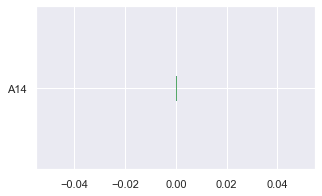

In [74]:
data['A14'].plot(kind='box',vert=False)

<AxesSubplot:>

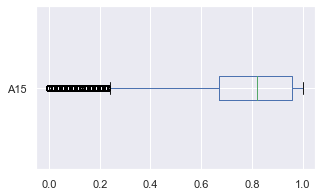

In [75]:
data['A15'].plot(kind='box',vert=False)

In [76]:
percentile25 = data['A15'].quantile(0.25)
percentile75 = data['A15'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.2899999999999999

In [77]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.3949999999999998
0.23500000000000015


In [78]:
data['A15'] = np.where(
    data['A15'] > upper_limit,
    upper_limit,
    np.where(
        data['A15'] < lower_limit,
        lower_limit,
        data['A15']
    )
)

<AxesSubplot:>

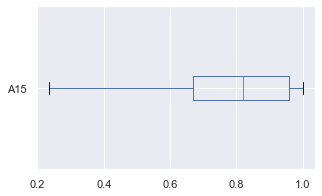

In [79]:
data['A15'].plot(kind='box',vert=False)

<AxesSubplot:>

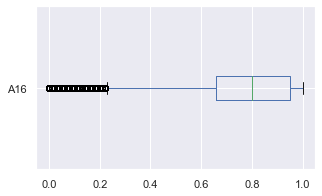

In [80]:
data['A16'].plot(kind='box',vert=False)

In [81]:
percentile25 = data['A16'].quantile(0.25)
percentile75 = data['A16'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.2899999999999999

In [82]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.3849999999999998
0.22500000000000014


In [83]:
data['A16'] = np.where(
    data['A16'] > upper_limit,
    upper_limit,
    np.where(
        data['A16'] < lower_limit,
        lower_limit,
        data['A16']
    )
)

<AxesSubplot:>

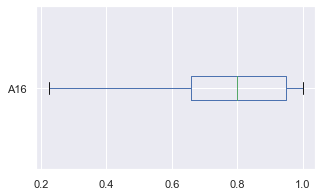

In [84]:
data['A16'].plot(kind='box',vert=False)

<AxesSubplot:>

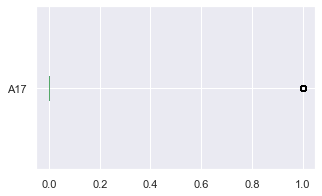

In [85]:
data['A17'].plot(kind='box',vert=False)

In [86]:
dups = data.pivot_table(index = ['A17'], aggfunc = 'size')
dups

A17
0    25283
1     6967
dtype: int64

In [87]:
percentile25 = data['A17'].quantile(0.25)
percentile75 = data['A17'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [88]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [89]:
data['A17'] = np.where(
    data['A17'] > upper_limit,
    upper_limit,
    np.where(
        data['A17'] < lower_limit,
        lower_limit,
        data['A17']
    )
)

<AxesSubplot:>

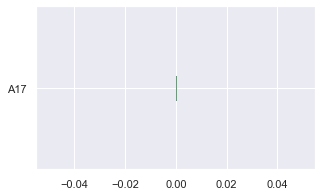

In [90]:
data['A17'].plot(kind='box',vert=False)

<AxesSubplot:>

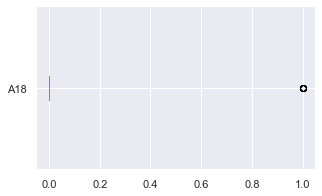

In [91]:
data['A18'].plot(kind='box',vert=False)

In [92]:
dups = data.pivot_table(index = ['A18'], aggfunc = 'size')
dups

A18
0    32242
1        8
dtype: int64

In [93]:
percentile25 = data['A18'].quantile(0.25)
percentile75 = data['A18'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [94]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [95]:
data['A18'] = np.where(
    data['A18'] > upper_limit,
    upper_limit,
    np.where(
        data['A18'] < lower_limit,
        lower_limit,
        data['A18']
    )
)

<AxesSubplot:>

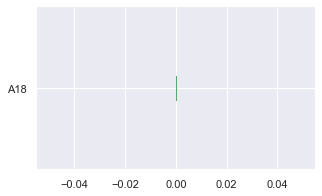

In [96]:
data['A18'].plot(kind='box',vert=False)

<AxesSubplot:>

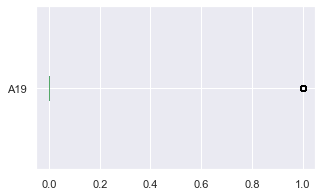

In [97]:
data['A19'].plot(kind='box',vert=False)

In [98]:
dups = data.pivot_table(index = ['A19'], aggfunc = 'size')
dups

A19
0    28187
1     4063
dtype: int64

In [99]:
percentile25 = data['A19'].quantile(0.25)
percentile75 = data['A19'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [100]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [101]:
data['A19'] = np.where(
    data['A19'] > upper_limit,
    upper_limit,
    np.where(
        data['A19'] < lower_limit,
        lower_limit,
        data['A19']
    )
)

<AxesSubplot:>

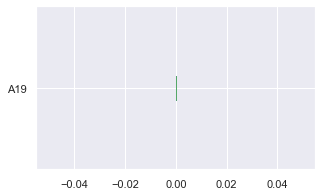

In [102]:
data['A19'].plot(kind='box',vert=False)

<AxesSubplot:>

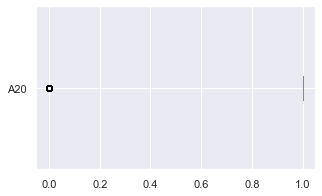

In [103]:
data['A20'].plot(kind='box',vert=False)

In [104]:
percentile25 = data['A20'].quantile(0.25)
percentile75 = data['A20'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [105]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.0
1.0


In [106]:
data['A20'] = np.where(
    data['A20'] > upper_limit,
    upper_limit,
    np.where(
        data['A20'] < lower_limit,
        lower_limit,
        data['A20']
    )
)

<AxesSubplot:>

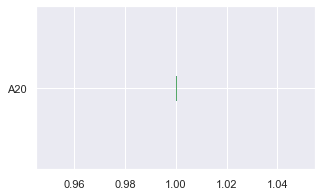

In [107]:
data['A20'].plot(kind='box',vert=False)

<AxesSubplot:>

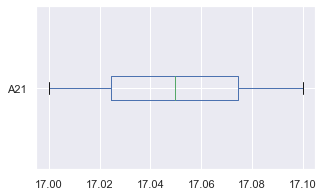

In [108]:
data['A21'].plot(kind='box',vert=False)

In [109]:
percentile25 = data['A21'].quantile(0.25)
percentile75 = data['A21'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.05001761499999802

In [110]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

17.1496095125
16.949539052500008


In [111]:
data['A21'] = np.where(
    data['A21'] > upper_limit,
    upper_limit,
    np.where(
        data['A21'] < lower_limit,
        lower_limit,
        data['A21']
    )
)

<AxesSubplot:>

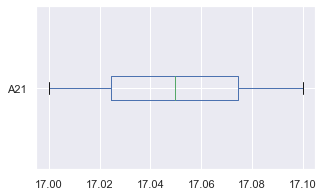

In [112]:
data['A21'].plot(kind='box',vert=False)

<AxesSubplot:>

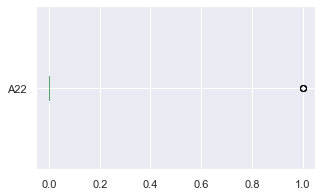

In [113]:
data['A22'].plot(kind='box',vert=False)

In [114]:
percentile25 = data['A22'].quantile(0.25)
percentile75 = data['A22'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [115]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [116]:
data['A22'] = np.where(
    data['A22'] > upper_limit,
    upper_limit,
    np.where(
        data['A22'] < lower_limit,
        lower_limit,
        data['A22']
    )
)

<AxesSubplot:>

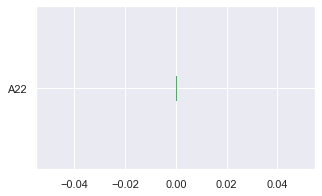

In [117]:
data['A22'].plot(kind='box',vert=False)

<AxesSubplot:>

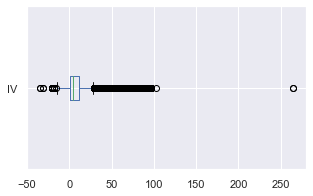

In [118]:
data['IV'].plot(kind='box',vert=False)

In [119]:
percentile25 = data['IV'].quantile(0.25)
percentile75 = data['IV'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

11.0

In [120]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

28.5
-15.5


In [121]:
data['IV'] = np.where(
    data['IV'] > upper_limit,
    upper_limit,
    np.where(
        data['IV'] < lower_limit,
        lower_limit,
        data['IV']
    )
)

<AxesSubplot:>

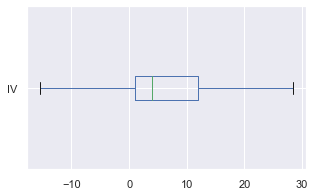

In [122]:
data['IV'].plot(kind='box',vert=False)

# We drop the columns which have iqr and upper andlower limit as zero

In [123]:
data=data.drop(['A3','A4','A13','A14','A18','A17','A19','A22'],axis=1)

In [124]:
data.shape

(32250, 13)

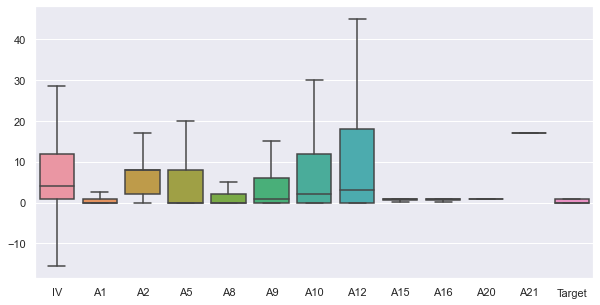

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

# Split the dataset into x and y train

In [126]:
Xtrain = data.drop(columns='Target', axis=1)
Ytrain = data['Target']

# Import the test dataset

In [127]:
testdata=pd.read_csv('Problem1_test.csv',na_values=['NA','-99'])
testdata.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1705146,2,0,8.0,0,0,0,1,3,0,...,0,0.17,0.33,0,0,0,1,17.085153,0,0
1,2136569,13,1,12.0,2,0,0,0,0,0,...,0,0.48,0.48,1,0,0,1,17.035763,0,0
2,2095809,19,0,8.0,0,0,0,0,0,0,...,0,0.77,0.74,0,0,0,1,17.001176,0,0
3,3144582,0,3,NaN,0,0,0,1,1,0,...,0,NaN,NaN,0,0,0,0,17.027939,0,0
4,1976044,18,0,2.0,0,0,0,0,0,0,...,0,NaN,NaN,1,0,0,1,17.072718,0,0


# Gather information and Check for null values in the test dataset

In [128]:
testdata.isnull().sum()

ID          0
IV          0
A1          0
A2        114
A3          0
A4          0
A5          0
A6          0
A7          0
A8          0
A9          0
A10         0
A11         0
A12         0
A13         0
A14         0
A15       136
A16       129
A17         0
A18         0
A19         0
A20         0
A21         0
A22         0
Target      0
dtype: int64

In [129]:
mean = data['A2'].mean()
testdata['A2'].fillna(value = mean, inplace = True)

In [130]:
mean1 = data['A15'].mean()
testdata['A15'].fillna(value = mean1, inplace = True)

In [131]:
mean2 = data['A16'].mean()
testdata['A16'].fillna(value = mean2, inplace = True)

In [132]:
testdata.isnull().sum()

ID        0
IV        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
A20       0
A21       0
A22       0
Target    0
dtype: int64

In [133]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2239 non-null   int64  
 1   IV      2239 non-null   int64  
 2   A1      2239 non-null   int64  
 3   A2      2239 non-null   float64
 4   A3      2239 non-null   int64  
 5   A4      2239 non-null   int64  
 6   A5      2239 non-null   int64  
 7   A6      2239 non-null   int64  
 8   A7      2239 non-null   int64  
 9   A8      2239 non-null   int64  
 10  A9      2239 non-null   int64  
 11  A10     2239 non-null   int64  
 12  A11     2239 non-null   int64  
 13  A12     2239 non-null   int64  
 14  A13     2239 non-null   int64  
 15  A14     2239 non-null   int64  
 16  A15     2239 non-null   float64
 17  A16     2239 non-null   float64
 18  A17     2239 non-null   int64  
 19  A18     2239 non-null   int64  
 20  A19     2239 non-null   int64  
 21  A20     2239 non-null   int64  
 22  

# Dropping the columns already dropped in train dataset

In [134]:
testdata=testdata.drop(['ID','A3','A4','A6','A7','A11','A13','A14','A18','A17','A19','A22'],axis=1)

In [135]:
testdata.shape

(2239, 13)

# Checking for outliers in the remaining columns and capping them

<AxesSubplot:>

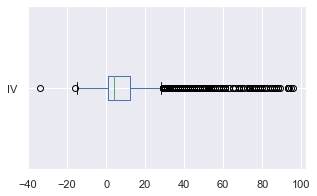

In [136]:
testdata['IV'].plot(kind='box',vert=False)

In [137]:
percentile25 = testdata['IV'].quantile(0.25)
percentile75 = testdata['IV'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

11.0

In [138]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

28.5
-15.5


In [139]:
testdata['IV'] = np.where(
    testdata['IV'] > upper_limit,
    upper_limit,
    np.where(
        testdata['IV'] < lower_limit,
        lower_limit,
        testdata['IV']
    )
)

<AxesSubplot:>

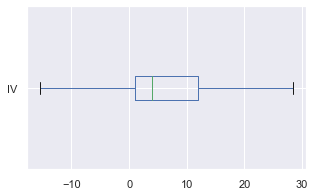

In [140]:
testdata['IV'].plot(kind='box',vert=False)

<AxesSubplot:>

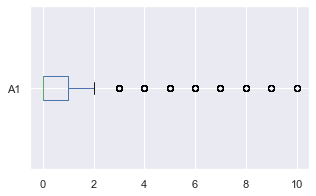

In [141]:
testdata['A1'].plot(kind='box',vert=False)

In [142]:
percentile25 = testdata['A1'].quantile(0.25)
percentile75 = testdata['A1'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.0

In [143]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [144]:
testdata['A1'] = np.where(
    testdata['A1'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A1'] < lower_limit,
        lower_limit,
        testdata['A1']
    )
)

<AxesSubplot:>

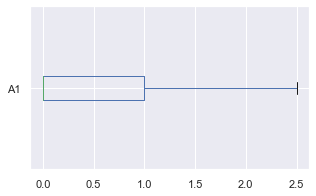

In [145]:
testdata['A1'].plot(kind='box',vert=False)

<AxesSubplot:>

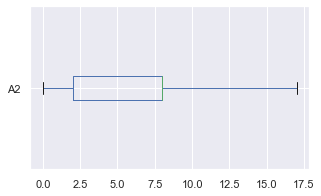

In [146]:
testdata['A2'].plot(kind='box',vert=False)

<AxesSubplot:>

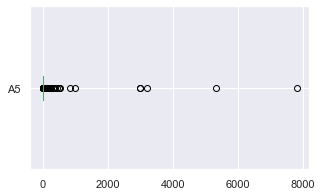

In [147]:
testdata['A5'].plot(kind='box',vert=False)

In [148]:
percentile25 = testdata['A5'].quantile(0.25)
percentile75 = testdata['A5'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

7.0

In [149]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

17.5
-10.5


In [150]:
testdata['A5'] = np.where(
    testdata['A5'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A5'] < lower_limit,
        lower_limit,
        testdata['A5']
    )
)

<AxesSubplot:>

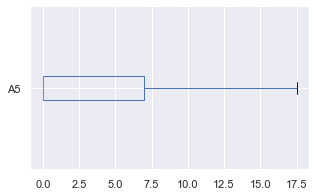

In [151]:
testdata['A5'].plot(kind='box',vert=False)

<AxesSubplot:>

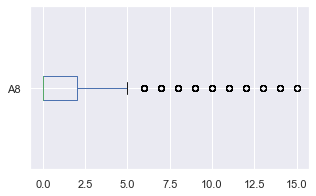

In [152]:
testdata['A8'].plot(kind='box',vert=False)

In [153]:
percentile25 = testdata['A8'].quantile(0.25)
percentile75 = testdata['A8'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

2.0

In [154]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

5.0
-3.0


In [155]:
testdata['A8'] = np.where(
    testdata['A8'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A8'] < lower_limit,
        lower_limit,
        testdata['A8']
    )
)

<AxesSubplot:>

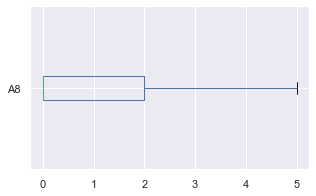

In [156]:
testdata['A8'].plot(kind='box',vert=False)

<AxesSubplot:>

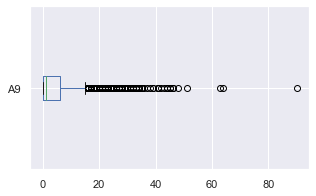

In [157]:
testdata['A9'].plot(kind='box',vert=False)

In [158]:
percentile25 = testdata['A9'].quantile(0.25)
percentile75 = testdata['A9'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

6.0

In [159]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

15.0
-9.0


In [160]:
testdata['A9'] = np.where(
    testdata['A9'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A9'] < lower_limit,
        lower_limit,
        testdata['A9']
    )
)

<AxesSubplot:>

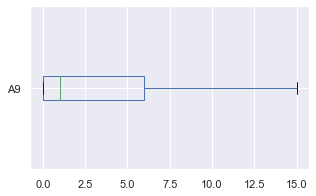

In [161]:
testdata['A9'].plot(kind='box',vert=False)

<AxesSubplot:>

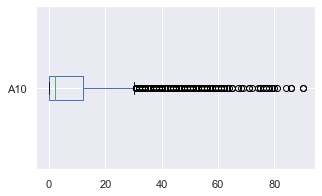

In [162]:
testdata['A10'].plot(kind='box',vert=False)

In [163]:
percentile25 = testdata['A10'].quantile(0.25)
percentile75 = testdata['A10'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

12.0

In [164]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

30.0
-18.0


In [165]:
testdata['A10'] = np.where(
    testdata['A10'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A10'] < lower_limit,
        lower_limit,
        testdata['A10']
    )
)

<AxesSubplot:>

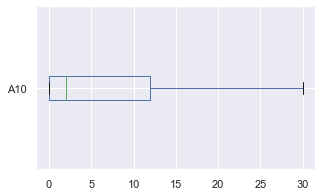

In [166]:
testdata['A10'].plot(kind='box',vert=False)

<AxesSubplot:>

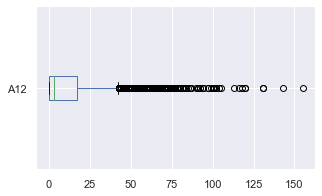

In [167]:
testdata['A12'].plot(kind='box',vert=False)

In [168]:
percentile25 = testdata['A12'].quantile(0.25)
percentile75 = testdata['A12'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

17.0

In [169]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

42.5
-25.5


In [170]:
testdata['A12'] = np.where(
    testdata['A12'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A12'] < lower_limit,
        lower_limit,
        testdata['A12']
    )
)

<AxesSubplot:>

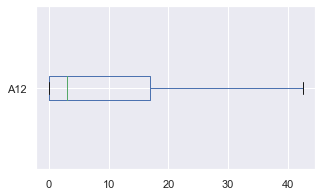

In [171]:
testdata['A12'].plot(kind='box',vert=False)

<AxesSubplot:>

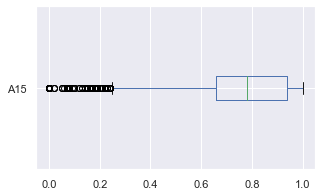

In [172]:
testdata['A15'].plot(kind='box',vert=False)

In [173]:
percentile25 = testdata['A15'].quantile(0.25)
percentile75 = testdata['A15'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.2799999999999999

In [174]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.3599999999999999
0.24000000000000016


In [175]:
testdata['A15'] = np.where(
    testdata['A15'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A15'] < lower_limit,
        lower_limit,
        testdata['A15']
    )
)

<AxesSubplot:>

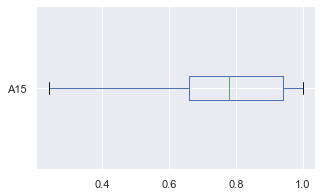

In [176]:
testdata['A15'].plot(kind='box',vert=False)

<AxesSubplot:>

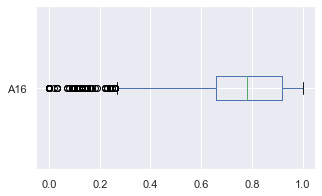

In [177]:
testdata['A16'].plot(kind='box',vert=False)

In [178]:
percentile25 = testdata['A16'].quantile(0.25)
percentile75 = testdata['A16'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.26

In [179]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.31
0.27


In [180]:
testdata['A16'] = np.where(
    testdata['A16'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A16'] < lower_limit,
        lower_limit,
        testdata['A16']
    )
)

<AxesSubplot:>

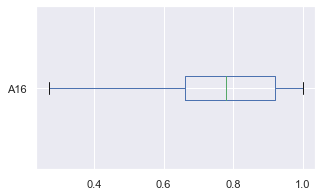

In [181]:
testdata['A16'].plot(kind='box',vert=False)

<AxesSubplot:>

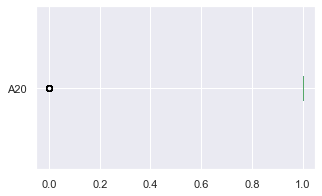

In [182]:
testdata['A20'].plot(kind='box',vert=False)

In [183]:
percentile25 = testdata['A20'].quantile(0.25)
percentile75 = testdata['A20'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.0

In [184]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

1.0
1.0


In [185]:
testdata['A20'] = np.where(
    testdata['A20'] > upper_limit,
    upper_limit,
    np.where(
        testdata['A20'] < lower_limit,
        lower_limit,
        testdata['A20']
    )
)

<AxesSubplot:>

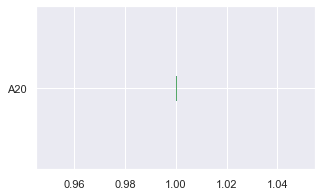

In [186]:
testdata['A20'].plot(kind='box',vert=False)

<AxesSubplot:>

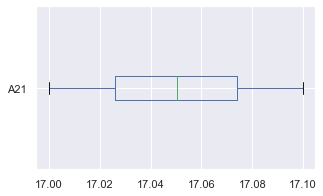

In [187]:
testdata['A21'].plot(kind='box',vert=False)

# Splitting the  test data into Xtest and Ytest

In [188]:
Xtest = testdata.drop(columns='Target', axis=1)
Ytest = testdata['Target']

# We import the packages needed for fitting the model using logistic regression

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [190]:
print(Xtrain.shape, Xtrain.shape, Xtest.shape)

(32250, 12) (32250, 12) (2239, 12)


In [191]:
model = LogisticRegression()

In [192]:
model.fit(Xtrain, Ytrain)

C:\Users\Apoorva Turup\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
X_train_prediction = model.predict(Xtest)
training_data_accuracy = accuracy_score(X_train_prediction, Ytest)

In [194]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8343010272443055


In [195]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, X_train_prediction)
cm

array([[1290,  143],
       [ 228,  578]], dtype=int64)

In [196]:
from sklearn.metrics import classification_report
print(classification_report(X_train_prediction,Ytest))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1518
           1       0.72      0.80      0.76       721

    accuracy                           0.83      2239
   macro avg       0.81      0.83      0.82      2239
weighted avg       0.84      0.83      0.84      2239



In [197]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
Log_ROC_auc = roc_auc_score(Ytest, model.predict(Xtest))
fpr, tpr, threshold = roc_curve(Ytest, model.predict_proba(Xtest) [:,1])

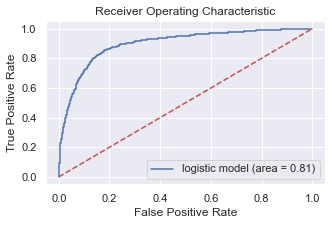

In [198]:
plt.figure()
plt.plot(fpr, tpr, label = "logistic model (area = %0.2f)" %Log_ROC_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()